# Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistens as possible. Using what you have learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in mojor metropolitan areas, such as london, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and mojor/minor category from Jan 2008-Dec 2016.

This Dataset contains:

    1.Isoa_code: this represents a policing area
    2.borough: the london borough for which the statistic is related
    3.major_category: the major crime category
    4.minor_category: the minor crime category
    5.value: the count of the crime for that particular borough, in that particular month
    6.year: the year of the summary statistic
    7.month: the month of the summary statistic
    
Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you are able to make decisions using data in a scientific manner. And the important things, Visualized the data. Example of the question can be : 

    1.What is the change in the number of crime incidents from the 2011 to 2016?
    2.What were the top 3 crimes per borough in 2016?

# Import Library

In [15]:
#Untuk Pemrosesan Data
import pandas as pd
import numpy as np
import folium

#Untuk Tujuan Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Untuk Membuat Word Cloud
from wordcloud import WordCloud

# Dataset Description

Dataset yang digunakan adalah data kejahatan di wilayah metropolitan besar, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori major atau minor dari Jan 2008-Des 2016. Data ini terdiri dari 13.490.604 baris data dengan 7 kolom yang mencakup:

    1.Isoa_code: ini mewakili area kepolisian
    2.borough: borough london yang statistiknya terkait
    3.major_category: kategori kejahatan besar
    4.minor_category : kategori kejahatan ringan
    5.value: jumlah kejahatan di wilayah tertentu, pada bulan tertentu
    6.year: tahun ringkasan statistik
    7.month: bulan ringkasan statistik

In [22]:
#Membaca Dataset
df = pd.read_csv('C:\london_crime_by_lsoa.csv')

#Menampilkan Dataset
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# Information Dataset

In [23]:
#Melihat Informasi tentang Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Data Preprocessing

In [24]:
#Menampilkan 10 Data Teratas
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


## Check for Missing Values in Dataset

In [25]:
#Mengecek Missing Value dalam kolom yang disediakan oleh dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Missing values tidak ditemukan maka data bisa langsung digunakan.

## Area Plot

Apa lima kejahatan major_category teratas yang terjadi kurun waktu 2008-2016?

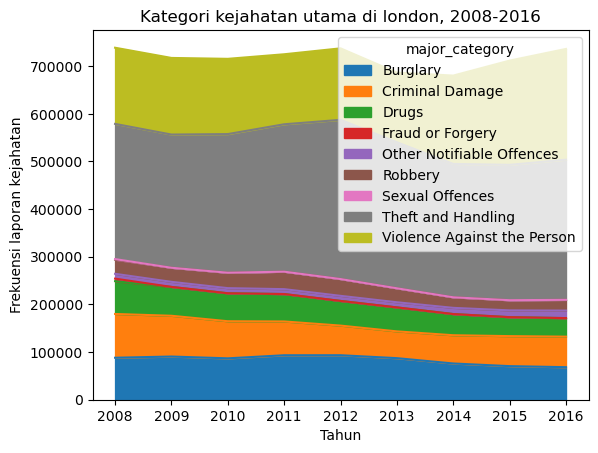

In [30]:
#Melakukan pengelompokkan dan menghitung total laporan kejahatan
df_grouped = df.groupby(['major_category', 'year']).agg({'value': 'sum'}).reset_index()

#Melakukan pivot untuk memudahkan visualisasi data
df_pivoted = df_grouped.pivot(index='year', columns='major_category', values='value')

#Melakukan visualisasi area
ax = df_pivoted.plot(kind='area')

#Menambahkan judul visualisasi, label sumbu x, dan label sumbu y
ax.set_title('Kategori kejahatan utama di london, 2008-2016')
ax.set_xlabel('Tahun')
ax.set_ylabel('Frekuensi laporan kejahatan')

#Menampilkan Visualisasi
plt.show()

## Analysis

Berdasarkan data visualisasi di atas, lima kategori kejahatan yang terjadi dari tahun 2008-2016 adalah :

    1.Violence Against the Person
    2.Theft and Handling
    3.Sexual Offences
    4.Robbery
    5.Other Notifiable Offences

## Line Plot

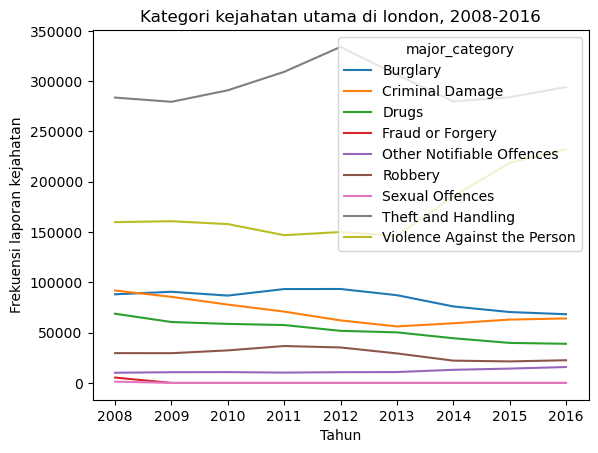

In [31]:
#Melakukan pengelompokkan dan menghitung total laporan kejahatan
df_grouped = df.groupby(['major_category', 'year']).agg({'value': 'sum'}).reset_index()

#Melakukan pivot untuk memudahkan visualisasi data
df_pivoted = df_grouped.pivot(index='year', columns='major_category', values='value')

#Melakukan visualisasi area
ax = df_pivoted.plot(kind='line')

#Menambahkan judul visualisasi, label sumbu x, dan label sumbu y
ax.set_title('Kategori kejahatan utama di london, 2008-2016')
ax.set_xlabel('Tahun')
ax.set_ylabel('Frekuensi laporan kejahatan')

#Menampilkan Visualisasi
plt.show()

## Analysis

Berdasarkan data visualisasi di atas, lima kategori kejahatan yang terjadi dari tahun 2008-2016 adalah :

    1.Violence Against the Person
    2.Theft and Handling
    3.Sexual Offences
    4.Robbery
    5.Other Notifiable Offences

## Histogram

Bagaimana frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun?

C:\Users\62857\AppData\Local\Temp\ipykernel_11284\2342343461.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['year_month', 'major_category']).sum()


<Figure size 1000x600 with 0 Axes>

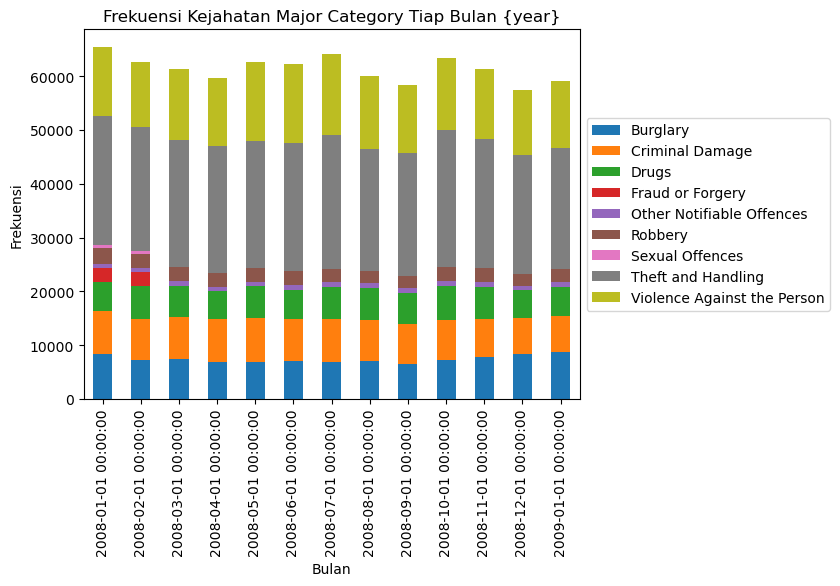

<Figure size 1000x600 with 0 Axes>

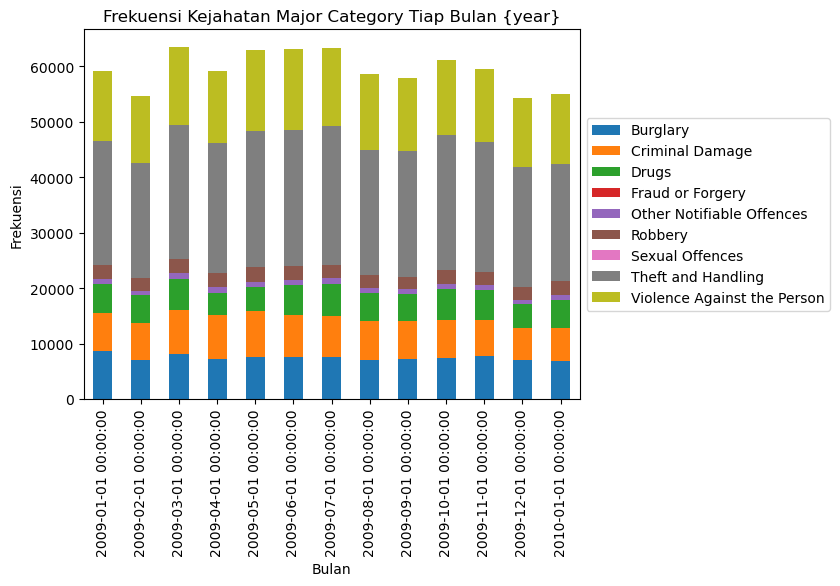

<Figure size 1000x600 with 0 Axes>

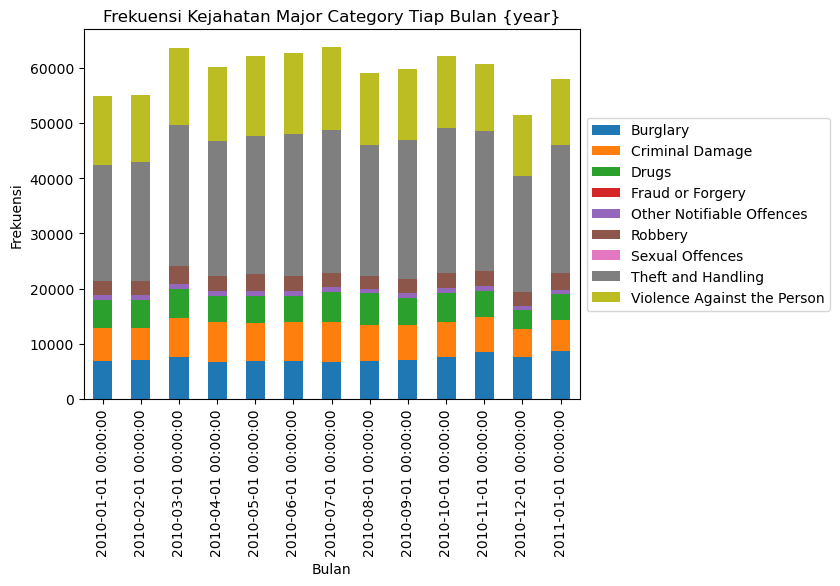

<Figure size 1000x600 with 0 Axes>

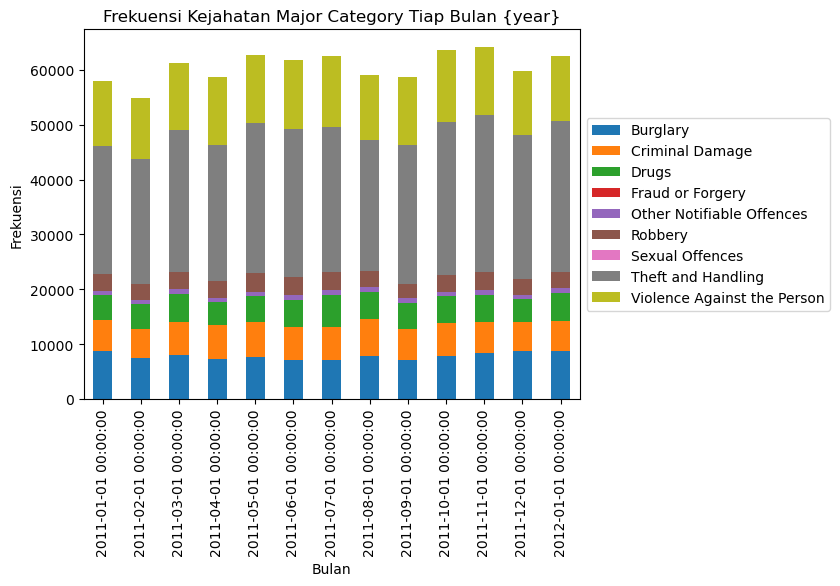

<Figure size 1000x600 with 0 Axes>

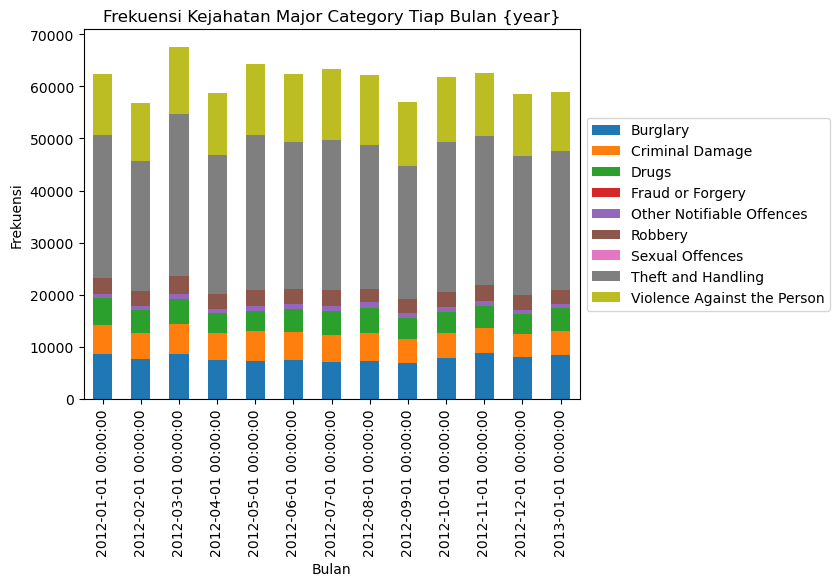

<Figure size 1000x600 with 0 Axes>

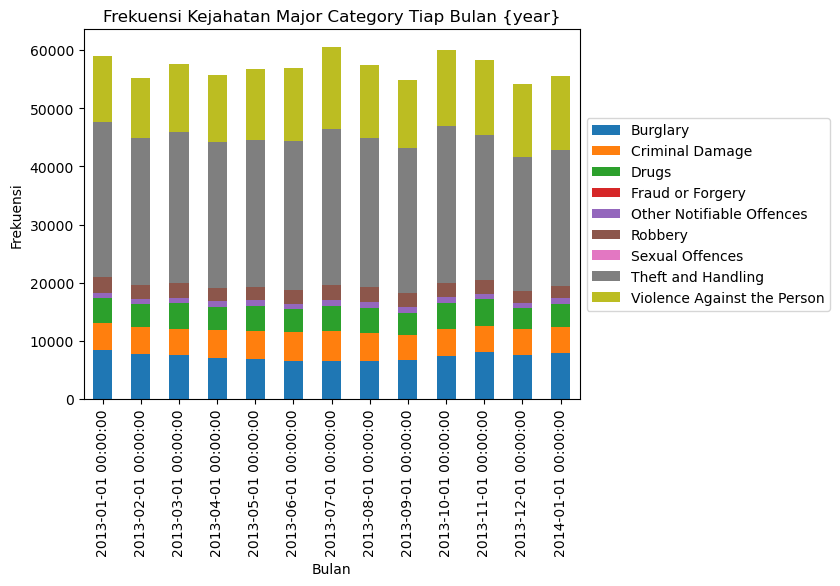

<Figure size 1000x600 with 0 Axes>

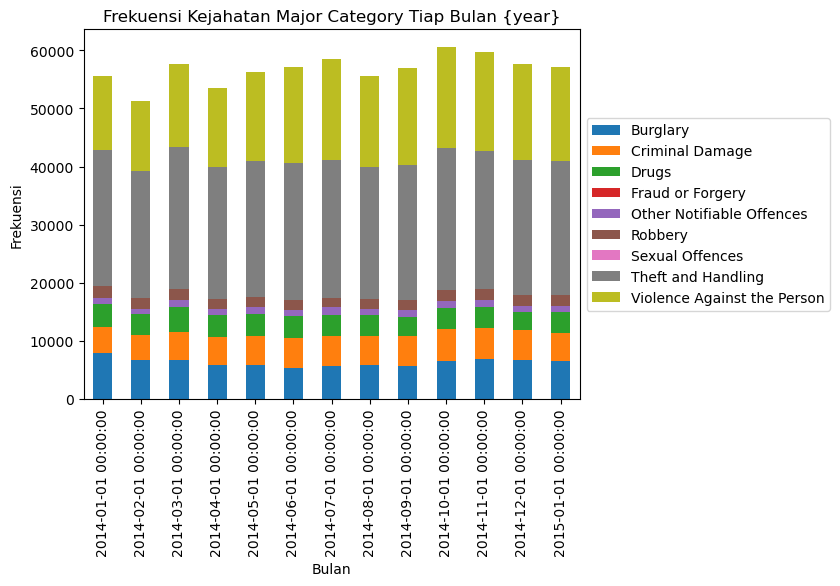

<Figure size 1000x600 with 0 Axes>

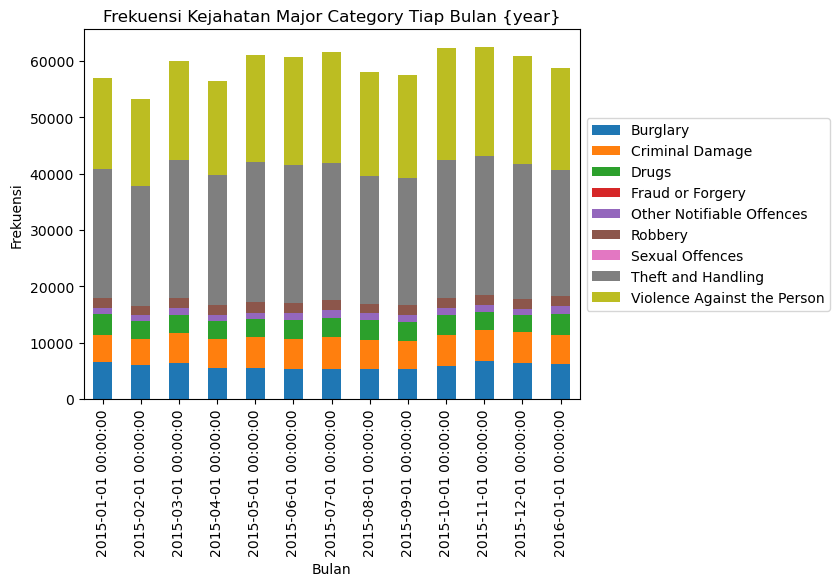

<Figure size 1000x600 with 0 Axes>

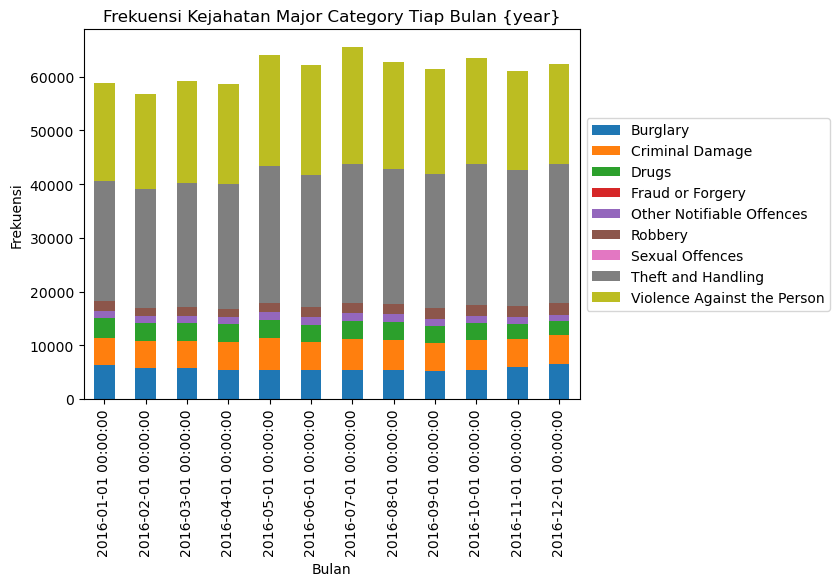

In [36]:
#Mengonversi kolom 'tahun' dan 'bulan' menjadi datetime 'tahun_bulan'
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

#Melakukan grouping dan menghitung total laporan kejahatan
grouped_data = df.groupby(['year_month', 'major_category']).sum()

#Pivot data untuk mempermudah visualisasi data
wide_data = grouped_data['value'].unstack()

#Membuat visualisasi bar bertumpuk untuk setiap tahun
for year in range (2008, 2017):
    plt.figure(figsize=(10,6))
    start_date = pd.Timestamp(str(year))
    end_date = pd.Timestamp(str(year+1))
    data = wide_data.loc[start_date:end_date, :]
    data.plot(kind='bar', stacked=True)
    plt.title("Frekuensi Kejahatan Major Category Tiap Bulan {year}")
    plt.xlabel('Bulan')
    plt.ylabel('Frekuensi')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

## Analysis

Dari hasil visualisasi di atas, tampak bahwa frekuensi kejahatan dalam major_category yang terjadi setiap bulan dalam tiap tahun mengalami penurunan secara terus-menerus, kecuali untuk kejahatan dalam major_category "Violence Against the Person" yang mengalami fluktuasi dengan kenaikan pada tahun 2012, diikuti oleh penurunan, dan kembali naik di tahun 2014 secara stabil hingga tahun berikutnya. Selain itu, terdapat juga kejahatan dalam major_category "Theft and Handling" yang mengalami kenaikan pada tahun yang sama, 2012, meskipun kemudian mengalami penurunan stabil pada tahun berikutnya.

## Bar Chart

Lima kejahatan minor tertinggi yang ada di kota London dalam kurun waktu 2008-2016?

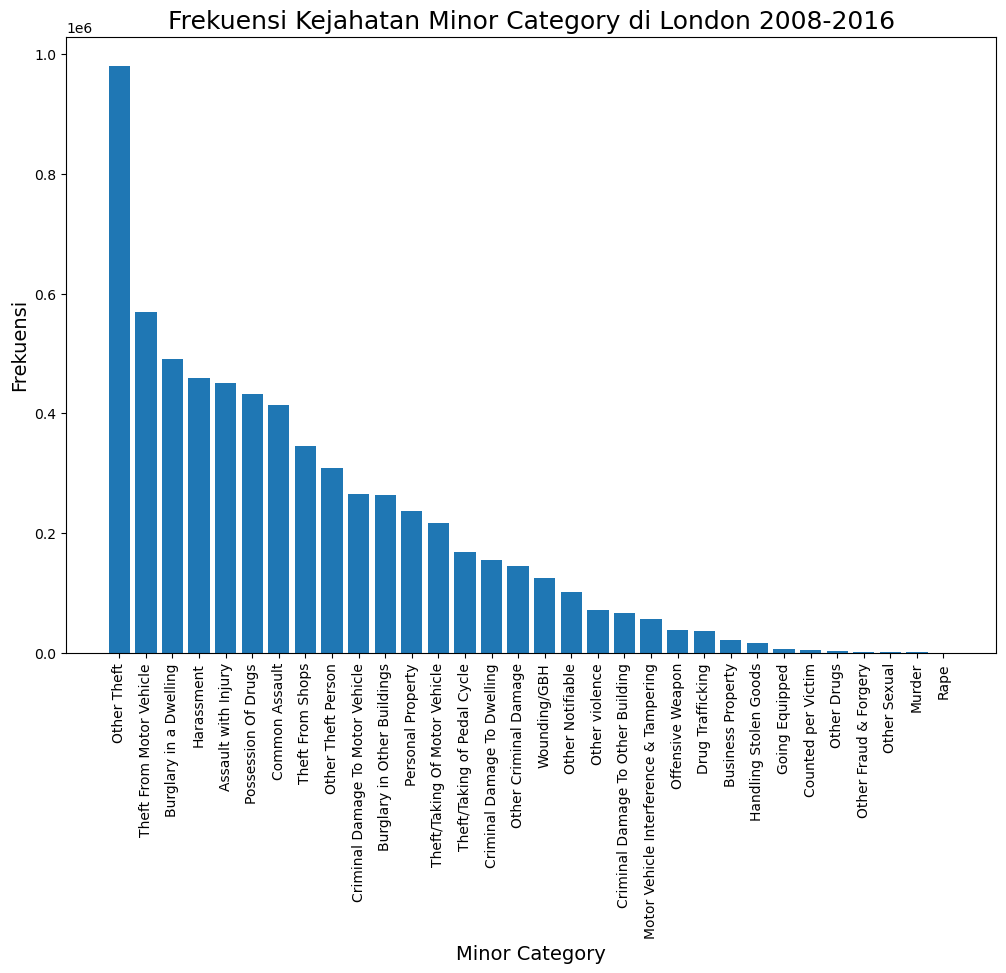

In [38]:
#Mengelompokkan data berdasarkan minor_category dan menjumlahkan kolom 'value'
grouped_data = df.groupby('minor_category')['value'].sum()

#Mengurutkan data secara menurun berdasarkan frekuensi
grouped_data = grouped_data.sort_values(ascending=False)

#Membuat Visualisasi bar menggunakan data dari data_terkelompok
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data.values)

#Menambahkan judul, label sumbu, dan legenda sumbu
plt.title("Frekuensi Kejahatan Minor Category di London 2008-2016", fontsize=18)
plt.xlabel('Minor Category', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Analysis

Dari visualisasi diatas, lima kejahatan minor tertinggi yang ada di London dalam kurun waktu 2008-2016, sebagai berikut :

    1.Other Theft
    2.Theft from Motor Vehicle
    3.Burglary in a Dwelling
    4.Harrassement
    5.Assault with Injury

## Pie Chart

Bagaimana persentase kejahatan minor yang terjadi dalam kurun waktu 2008-2016?

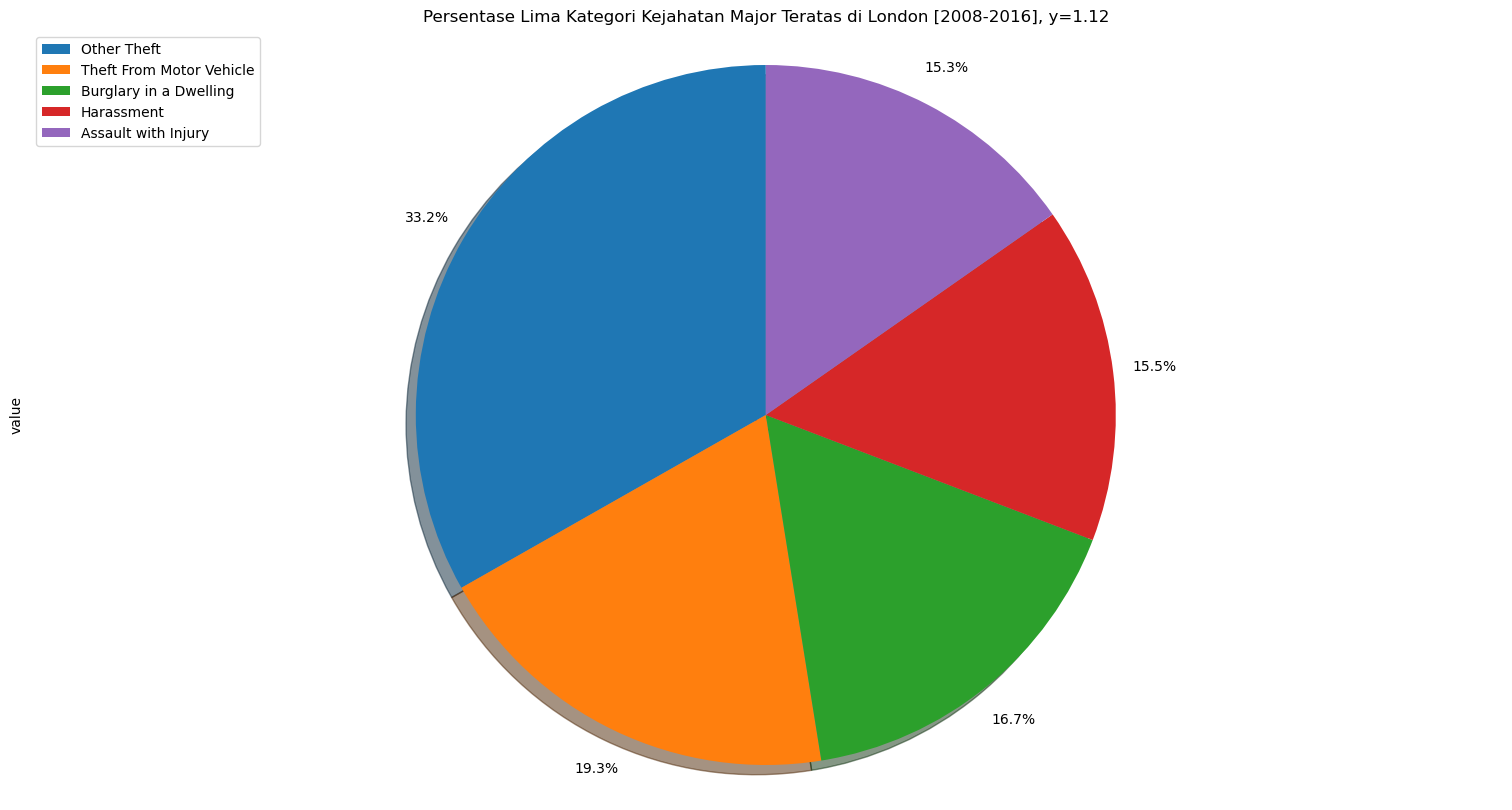

In [41]:
#Mengelompokkan data berdasarkan 'minor_category' dan menjumlahkan kolom 'value'
minor_cat = df.groupby('minor_category')['value'].sum()

#Mengurutkan data secara meningkat berdasarkan frekuensi
minor_cat = minor_cat.sort_values(ascending=False)[:5]

#Membuat visualisasi diagram pie chart
minor_cat.plot(kind='pie',
                    figsize = (19, 10),
                    autopct = '%1.1f%%',
                    startangle=90,
                    shadow=True, 
                    labels=None,
                    pctdistance= 1.12,
                    )
plt.title('Persentase Lima Kategori Kejahatan Major Teratas di London [2008-2016], y=1.12')
plt.axis('equal')
plt.legend(labels=minor_cat.index, loc='upper left')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa persentase jumlah kejahatan minor_category tertinggi adalah :

    1.Other Theft : 33.2%
    2.Theft from Motor Vehicle : 19.3%
    3.Burglary in a Dwelling : 16.7%
    4.Harrassement : 15.5%
    5.Assault with Injury : 15.3%

## Box Plot

Apa borough yang memiliki variabilitas tertinggi dalam jumlah laporan kejahatan?

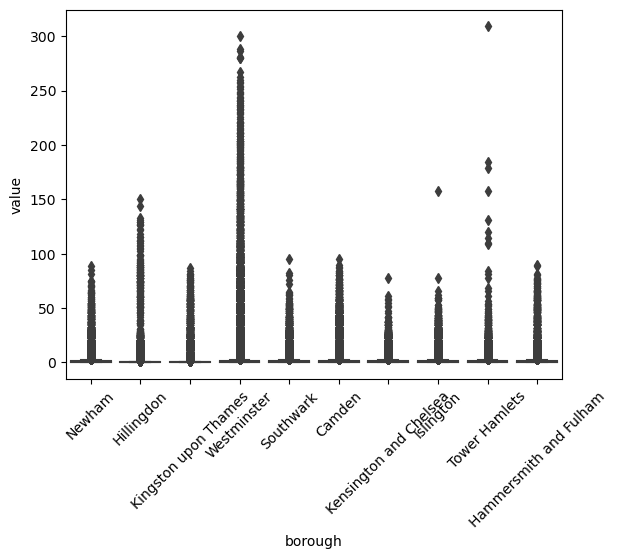

In [42]:
#Membuat subset dataframe yang hanya berisi variable 'borough' dan 'value'
df_borough = df[['borough', 'value']]

#Menghitung variansi untuk setiap borough
variances = df_borough.groupby(['borough']).var()['value'].sort_values(ascending=False)

#Mengambil 10 borough dengan variansi tertinggi
top10_variances = variances[:10].index.tolist()

#Membuat box plot untuk 10 borough dengan variansi tertinggi
sns.boxplot(x='borough', y='value', data=df_borough[df_borough['borough'].isin(top10_variances)])
plt.xticks(rotation=45)
plt.show()

Dari data diatas bisa dilihat 10 borough teratas memiliki variansi tinggi yang mana menandakan adanya ketidaksesuaian data atau banyak perbedaan data. Oleh karena itu, perlu penyesuaian kembali agar data tersebut dapat berkurang variansinya dan meningkatkan keakuratan hasil analisis.

## Scatter Plot

Bagaimana hubungan antara jumlah laporan kejahatan dengan tahun yang dilaporkan?

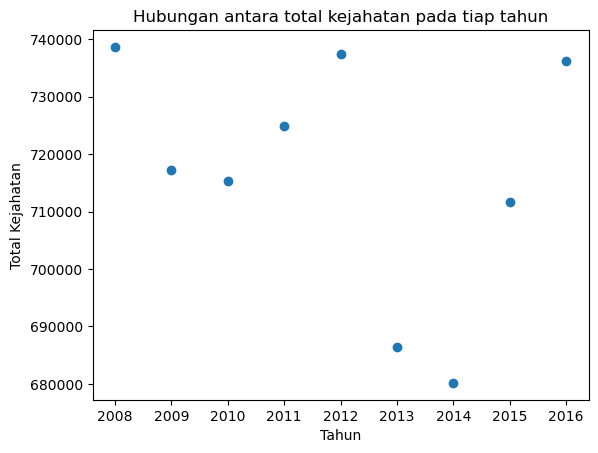

In [43]:
#Mengelompokkan data berdasarkan tahun
df_by_year = df.groupby('year')['value'].sum().reset_index()

#Membuat Scatter Plot
plt.scatter(x=df_by_year['year'], y=df_by_year['value'])

#Membuat Visualisasi
plt.xlabel('Tahun')
plt.ylabel('Total Kejahatan')
plt.title('Hubungan antara total kejahatan pada tiap tahun')
plt.show()

## Analysis

Dari hasil visualisasi scatter plot di atas menunjukkan bahwa tren penurunan terjadi dari tahun 2008 hingga 2013 sampai pada tahun berikutnya mengalami peningkatan hingga tahun 2016.

## Word Clouds

Bagaimana perbandingan frekuensi laporan kejahatan antara major dan minor category yang berbeda dalam data tersebut?

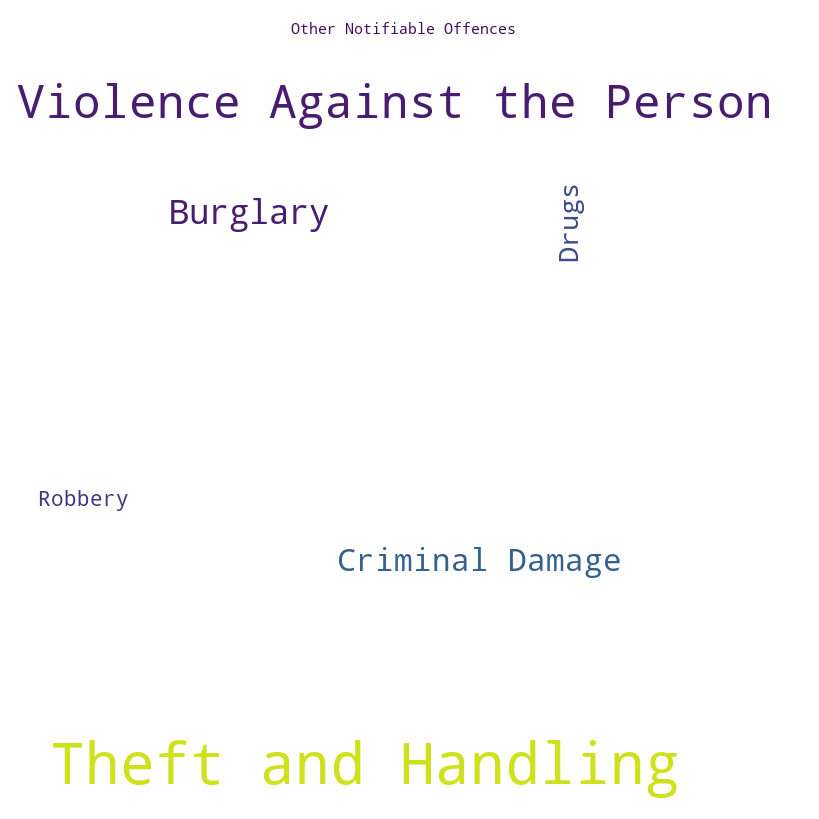

In [46]:
#Mengelompokkan data berdasarkan kategori major dan menghitung frekuensinya
minor_category_count = df.groupby('major_category')['value'].sum()

#Mengelompokkan data berdasarkan kategori minor dan menghitung frekuensinya
minor_category_dict = minor_category_count.to_dict()

#Mengelompokkan data berdasarkan kategori minor dan menghitung frekuensinya
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(minor_category_dict)

#Menampilkan word Cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Analysis

Hasil dari visualisasi di atas menunjukkan bahwa Theft and Handling tercetak dengan fontsize yang lebih besar dari yang lain sehingga dapat disimpulkan bahwa kejahatan tersebut merupakan kejahatan yang banyak terjadi di London.

## Overall Analysis

   
    1.Theft and Handling menjadi kasus kejahatan major_category terbanyak berdasarkan visualisasi word clouds dan untuk kejahatan minor_category, Other Theft menjadi kasus terbanyaknya berdasarkan visualisasi pie chart.
    2.Violence Against the Person pada major_category memiliki frekuensi tertinggi pada pelaporan kejahatan berdasarkan data area plot dan Other Theft pada minor_category memiliki frekuensi tertinggi pada pelaporan kejahatan berdasarkan data bar chart.
    3.Tren penurunan kejahatan terjadi dari tahun 2008 hingga 2013 dan pada pada tahun berikutnya mengalami peningkatan hingga tahun 2016.
    4.Frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun sedikit demi sedikit mengalami penurunan yang berkelanjutan kecuali untuk kejahatan major_category Violence Against the Person yang mengalami pasang surut dengan kenaikkan di tahun 2012 kemudian turun lalu naik kembali di tahun 2014 secara konstan ke tahun berikutnya dan juga kejahatan major_category Theft and Handling yang naik di tahun yang sama 2012 walaupun pada tahun berikutnya dia mengalami penurunan yang konstan.
    5.Hasil visualisasi box plot memperlihatkan bahwa adanya ketidak sesuaian data karena banyaknya variasi sehingga perlu proses lebih lanjut untuk mengatasi dataset yang ada
    6.City of Westminster menjadi borough dengan aktivitas kejahatan terbanyak.